Machine Learning Project-Major

There are two classes and the goal is to distinguish between
spill and non-spill using the features for a given ocean patch.
-> Non-Spill: negative case, or majority class.
-> Oil Spill: positive case, or minority class.
There are a total of 50 Columns in the Dataset , the output column is named as target.

#### Q1. Download the Oil Spill Dataset and perform Data cleaning and Data Pre-Processing if Necessary

In [ ]:
##### Importing Nessessury Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading Dataset

In [5]:
df= pd.read_csv('oil_spill.csv')
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [6]:
# Shape
df.shape
# rows-937 col-50

(937, 50)

In [9]:
#### Attributes or Properties
print(df.shape)
print(df.index)
print(df.columns)
print(df.values)

(937, 50)
RangeIndex(start=0, stop=937, step=1)
Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49', 'target'],
      dtype='object')
[[1.00000e+00 2.55800e+03 1.50609e+03 ... 6.57400e+01 7.95000e+00
  1.00000e+00]
 [2.00000e+00 2.23250e+04 7.91100e+01 ... 6.57300e+01 6.26000e+00
  0.00000e+00]
 [3.00000e+00 1.15000e+02 1.44985e+03 ... 6.58100e+01 7.84000e+00
  1.00000e+00]
 ...
 [2.02000e+02 1.40000e+01 2.51400e+01 ... 6.59100e+01 6.12000e+00
  0.00000e+00]
 [2.03000e+02 1.00000e+01 9.60000e+01 ... 6.59700e+01 6.32000e+00
  0.00000e+00]
 [2.04000e+02 1.10000e+01 7.73000e+00 ... 6.56500e+01 6.26000e+00
  0.00000e+00]]


#### Data Preprocessing :

##### 1. Null Value handling

In [10]:
df.isnull().sum()

f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64

##### 2. Handling Duplicates

In [11]:
df.duplicated().sum()

0

##### 3.Checking Datatypes

In [16]:
df.dtypes
df.dtypes.value_counts()

float64    39
int64      11
Name: count, dtype: int64

##### Q2. Use various methods such as Handling null values, One-Hot Encoding, Imputation, and Scaling of Data Pre-Processing where necessary.

##### EDA

In [22]:
for i in df.columns:
    print(f'{i} | Count of Unique Values {df[i].nunique()}')

f_1 | Count of Unique Values 238
f_2 | Count of Unique Values 297
f_3 | Count of Unique Values 927
f_4 | Count of Unique Values 933
f_5 | Count of Unique Values 179
f_6 | Count of Unique Values 375
f_7 | Count of Unique Values 820
f_8 | Count of Unique Values 618
f_9 | Count of Unique Values 561
f_10 | Count of Unique Values 57
f_11 | Count of Unique Values 577
f_12 | Count of Unique Values 59
f_13 | Count of Unique Values 73
f_14 | Count of Unique Values 107
f_15 | Count of Unique Values 53
f_16 | Count of Unique Values 91
f_17 | Count of Unique Values 893
f_18 | Count of Unique Values 810
f_19 | Count of Unique Values 170
f_20 | Count of Unique Values 53
f_21 | Count of Unique Values 68
f_22 | Count of Unique Values 9
f_23 | Count of Unique Values 1
f_24 | Count of Unique Values 92
f_25 | Count of Unique Values 9
f_26 | Count of Unique Values 8
f_27 | Count of Unique Values 9
f_28 | Count of Unique Values 308
f_29 | Count of Unique Values 447
f_30 | Count of Unique Values 392
f_31 | 

In [45]:
for i in df.columns:
    if df[i].nunique()<5:
        print(f'{i} | Count of Unique Values {df[i].nunique()}')



f_23 | Count of Unique Values 1
f_33 | Count of Unique Values 4
f_37 | Count of Unique Values 3
f_46 | Count of Unique Values 2
target | Count of Unique Values 2


In [39]:
for i in df.columns:
    if df[i].nunique()>10:
        print(f'{i} | Count of Unique Values {df[i].nunique()}')

f_1 | Count of Unique Values 238
f_2 | Count of Unique Values 297
f_3 | Count of Unique Values 927
f_4 | Count of Unique Values 933
f_5 | Count of Unique Values 179
f_6 | Count of Unique Values 375
f_7 | Count of Unique Values 820
f_8 | Count of Unique Values 618
f_9 | Count of Unique Values 561
f_10 | Count of Unique Values 57
f_11 | Count of Unique Values 577
f_12 | Count of Unique Values 59
f_13 | Count of Unique Values 73
f_14 | Count of Unique Values 107
f_15 | Count of Unique Values 53
f_16 | Count of Unique Values 91
f_17 | Count of Unique Values 893
f_18 | Count of Unique Values 810
f_19 | Count of Unique Values 170
f_20 | Count of Unique Values 53
f_21 | Count of Unique Values 68
f_24 | Count of Unique Values 92
f_28 | Count of Unique Values 308
f_29 | Count of Unique Values 447
f_30 | Count of Unique Values 392
f_31 | Count of Unique Values 107
f_32 | Count of Unique Values 42
f_34 | Count of Unique Values 45
f_35 | Count of Unique Values 141
f_36 | Count of Unique Values 110

In [46]:
df['f_23'].value_counts()  


f_23
0    937
Name: count, dtype: int64

In [69]:
df.drop('f_23',axis=1,inplace=True)
## drop column due to all are 0 value except 1 

In [53]:
df.columns

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29',
       'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38',
       'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47',
       'f_48', 'f_49', 'target'],
      dtype='object')

In [54]:
df['target'].value_counts()

target
0    896
1     41
Name: count, dtype: int64

In [57]:
df.describe().T[['min','max']]

,min,max
f_1,1.00,352.00
f_2,10.00,32389.00
f_3,1.92,1893.08
f_4,1.00,2724.57
f_5,0.00,180.00
f_6,70312.00,71315000.00
f_7,21.24,82.64
f_8,0.83,24.69
f_9,667.00,160740.00
f_10,0.02,0.74


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
f_1,937.0,81.588047,6.497673e+01,1.00,31.00,64.00,124.00,352.00
f_2,937.0,332.842049,1.931939e+03,10.00,20.00,65.00,132.00,32389.00
f_3,937.0,698.707086,5.999656e+02,1.92,85.27,704.37,1223.48,1893.08
f_4,937.0,870.992209,5.227993e+02,1.00,444.20,761.28,1260.37,2724.57
f_5,937.0,84.121665,4.536177e+01,0.00,54.00,73.00,117.00,180.00
f_6,937.0,769696.378869,3.831151e+06,70312.00,125000.00,186300.00,330468.00,71315000.00
f_7,937.0,43.242721,1.271840e+01,21.24,33.65,39.97,52.42,82.64
f_8,937.0,9.127887,3.588878e+00,0.83,6.75,8.20,10.76,24.69
f_9,937.0,3940.712914,8.167428e+03,667.00,1371.00,2090.00,3435.00,160740.00
f_10,937.0,0.221003,9.031555e-02,0.02,0.16,0.20,0.26,0.74


In [72]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [73]:
## Handling null values
df.isnull().sum()
## Drop rows with missing values
df.dropna(inplace=True)
##Impute missing values
imputer = SimpleImputer(strategy='mean')
imputed_df = imputer.fit_transform(df)

# One-Hot Encoding categorical data
encoder = OneHotEncoder(sparse_output=False, drop='first') 
encoded_df = pd.DataFrame(encoder.fit_transform(df[['target']]))
df1 = pd.concat([df, encoded_df], axis=1)
df1.drop(['target'], axis=1, inplace=True)

# Scaling of numerical features
scaler = StandardScaler()
scaler_df = scaler.fit_transform(encoded_df)

In [74]:
df.describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


##### Q3. Derive some insights from the dataset.

###### Correlation

Correlation with target variable:
f_1      -0.180531
f_2       0.034128
f_3      -0.035221
f_4      -0.050489
f_5      -0.078598
f_6       0.049318
f_7      -0.026183
f_8      -0.014434
f_9       0.076679
f_10     -0.013359
f_11      0.157588
f_12      0.018417
f_13      0.036129
f_14      0.044022
f_15     -0.008092
f_16      0.050515
f_17      0.014977
f_18     -0.006263
f_19      0.022329
f_20     -0.049940
f_21     -0.017439
f_22      0.035323
f_24     -0.040364
f_25     -0.013202
f_26     -0.054643
f_27     -0.068181
f_28      0.061178
f_29      0.021424
f_30     -0.050517
f_31      0.041730
f_32      0.013173
f_33     -0.012170
f_34      0.014008
f_35      0.046540
f_36      0.040756
f_37     -0.100417
f_38      0.041885
f_39      0.033768
f_40      0.066220
f_41      0.148987
f_42      0.050657
f_43      0.046533
f_44      0.031244
f_45      0.016261
f_46      0.058537
f_47      0.436890
f_48     -0.003163
f_49      0.008365
target    1.000000
Name: target, dtype: float64


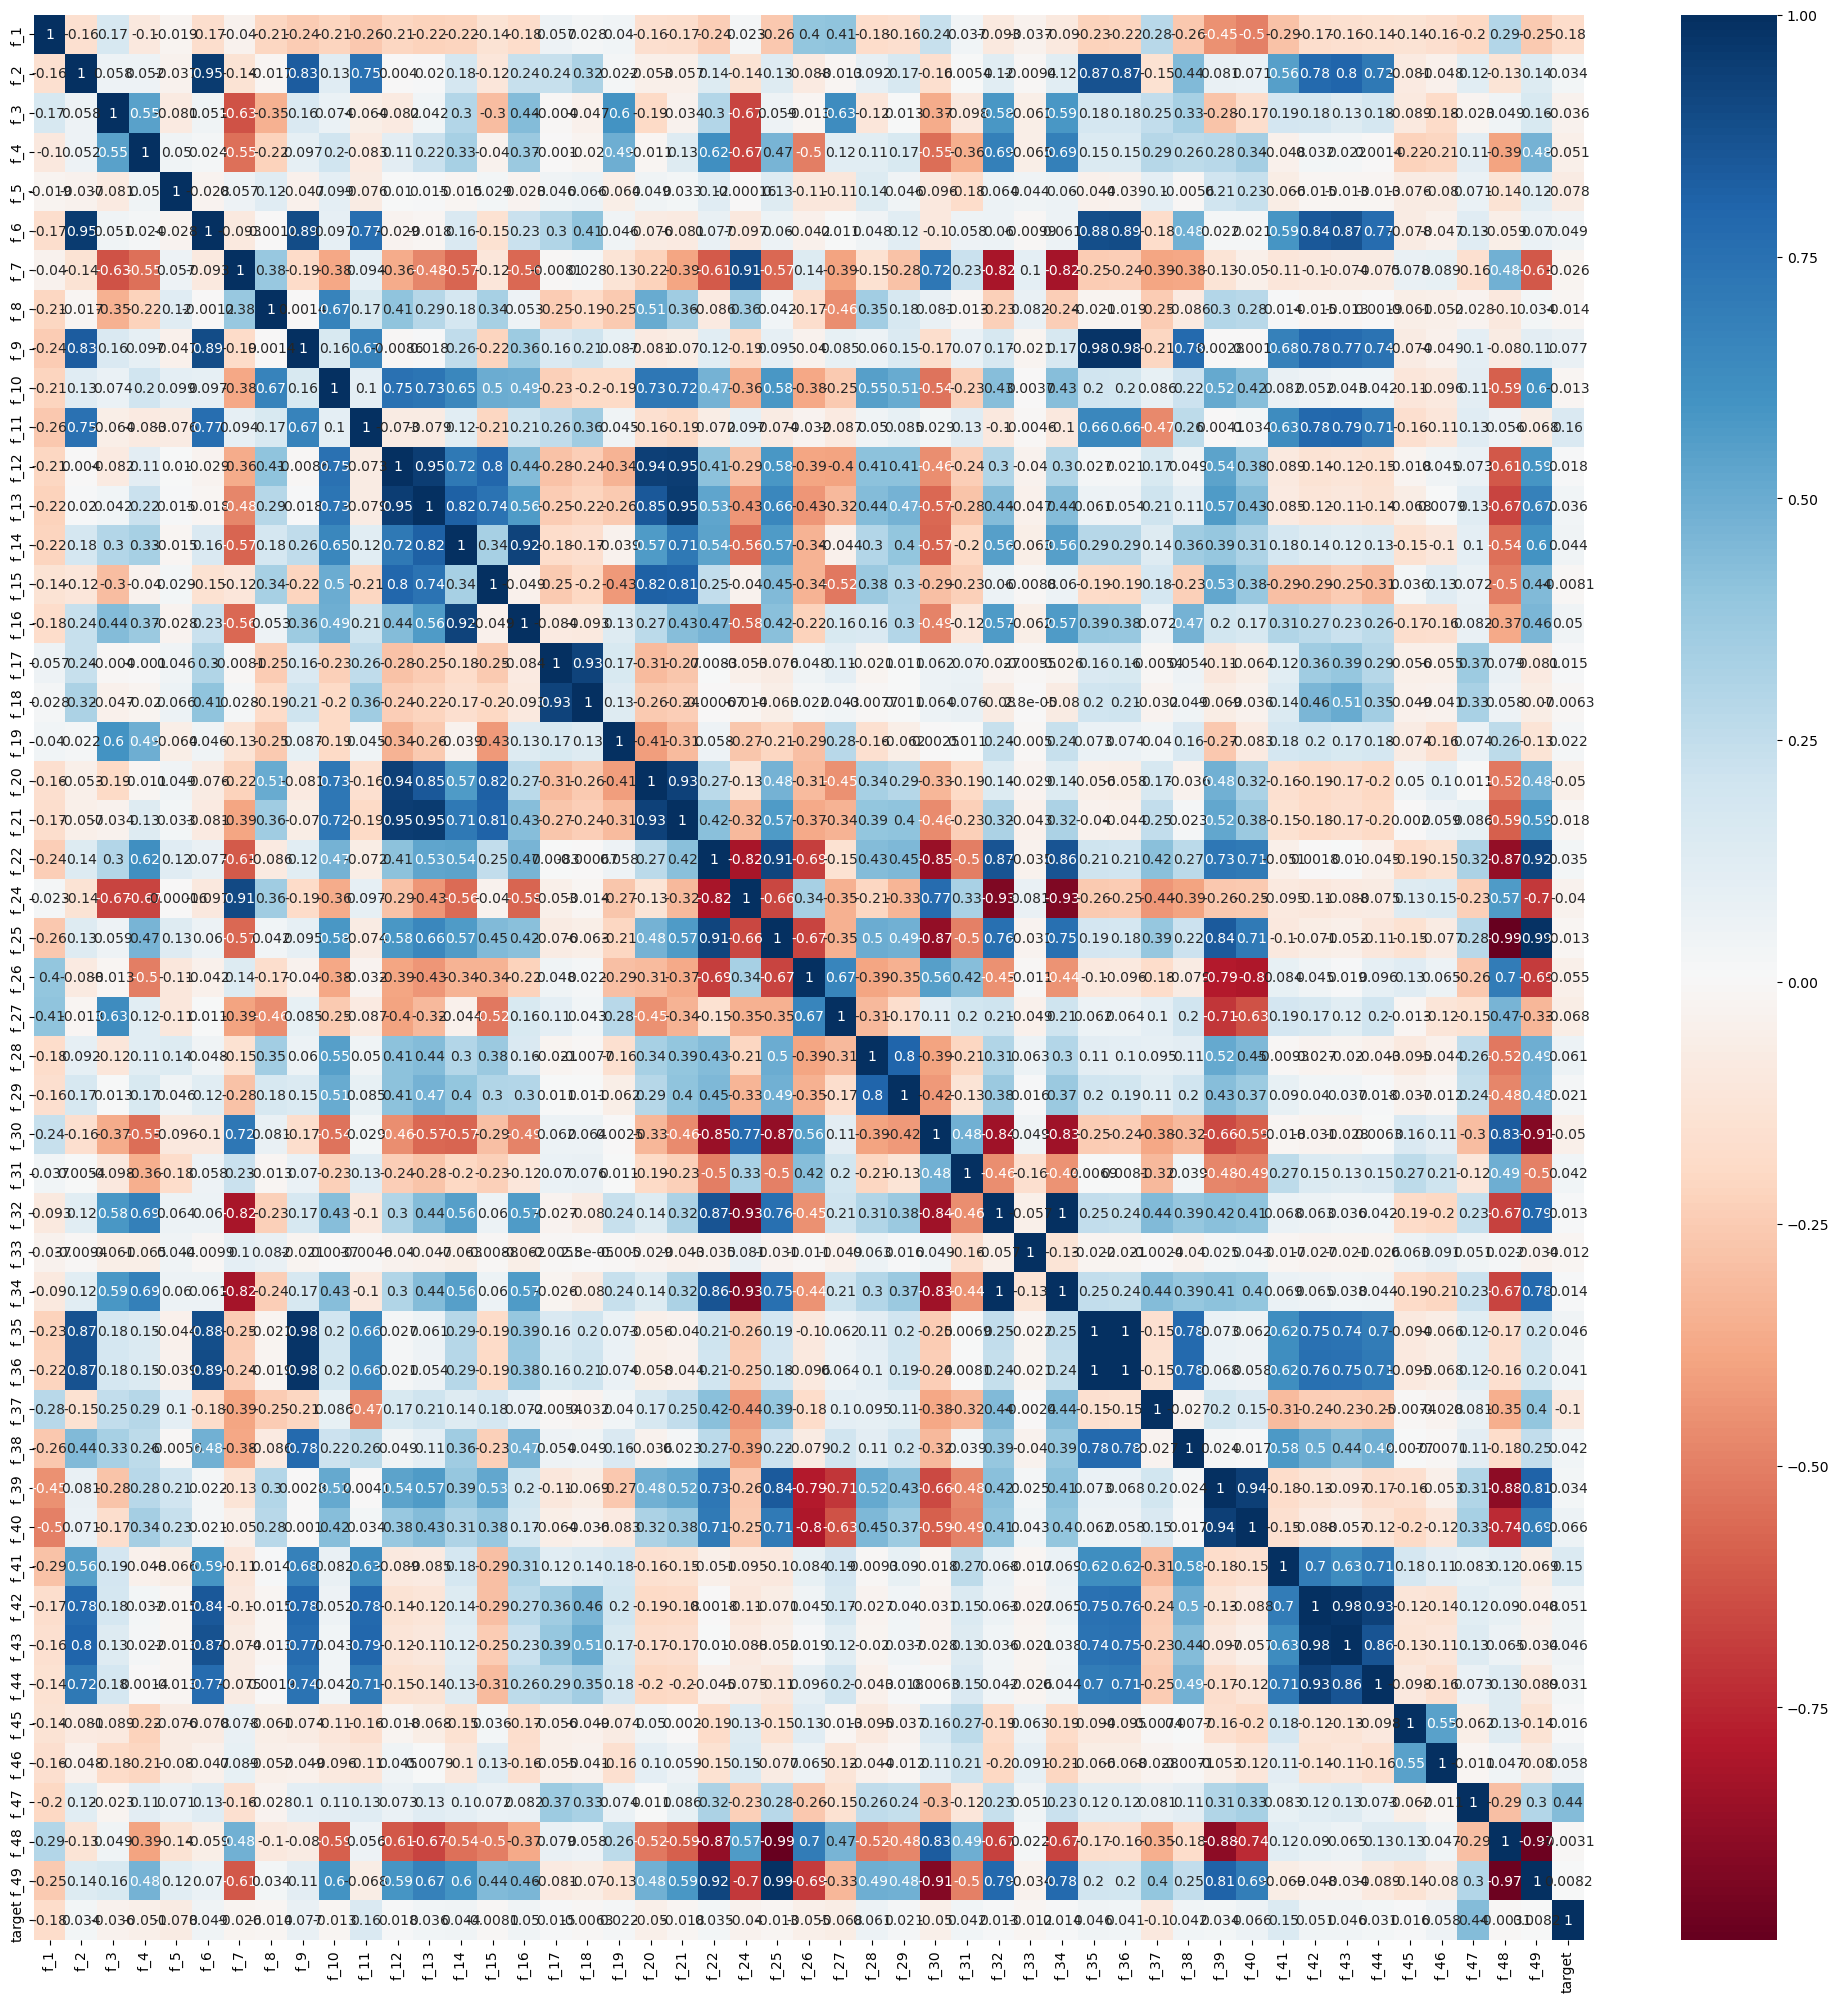

In [76]:
## Calculate the correlation between features and the target variable
correlation = df.corr()['target']
print("Correlation with target variable:")
print(correlation)

## heatmap 

corr = df.iloc[:-1].corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()


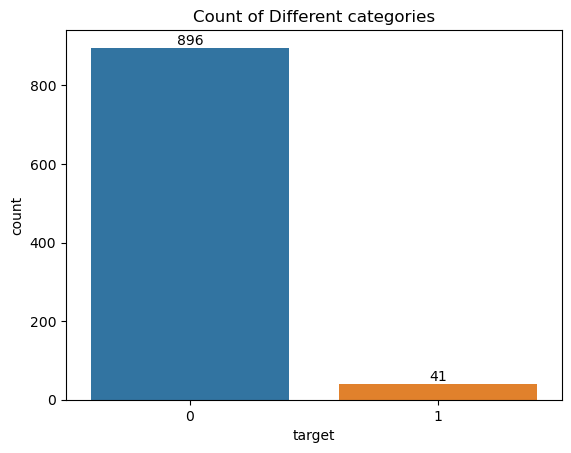

In [77]:
#### count plot
fig, ax = plt.subplots(1,1)
sns.countplot(x=df['target'],
             order = df['target'].value_counts().sort_values(ascending=False).index,ax=ax)
ax.bar_label(ax.containers[0])
plt.title('Count of Different categories')
plt.show()

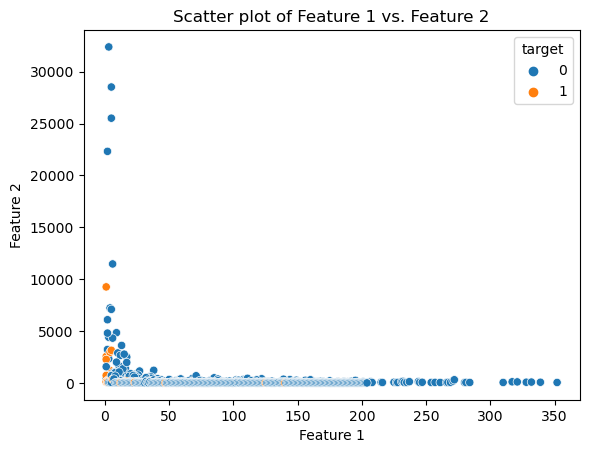

In [78]:
### Explore relationships between features using scatter plots 
import seaborn as sns
sns.scatterplot(x='f_1', y='f_2', hue='target', data=df)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of Feature 1 vs. Feature 2')
plt.show()

In [82]:
## Identify outliers in numeric columns
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
 q1 = df[col].quantile(0.25)
 q3 = df[col].quantile(0.75)
 iqr = q3 - q1
 lower_bound = q1 - 1.5 * iqr
 upper_bound = q3 + 1.5 * iqr
 outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
 print("Outliers in", col)
 print(outliers)

print(df.shape)
    

Outliers in f_1
     f_1  f_2      f_3      f_4  f_5     f_6    f_7    f_8     f_9  f_10  ...  \
283  266   51   508.53   162.41   62  127500  37.33   1.21  1770.0  0.03  ...   
284  267   61  1352.54   204.51   24  152500  28.36   7.27  1930.0  0.26  ...   
285  269   64   475.50   266.16   32  160000  38.28   1.23  1940.0  0.03  ...   
286  271  191  1263.12   945.90   57  477500  29.79   7.58  3690.0  0.25  ...   
287  272  315  1248.79   856.47   74  787500  29.14   9.02  5590.0  0.31  ...   
288  280   51  1284.37    13.27   64  127500  29.96   6.34  1890.0  0.21  ...   
289  281   56  1186.32   397.04  118  140000  33.05  10.33  2190.0  0.31  ...   
290  284   55  1002.47  1192.27    8  137500  30.49   7.86  1580.0  0.26  ...   
291  310   55  1208.25  1012.00  167  137500  31.71   6.50  1530.0  0.20  ...   
292  317  117  1269.88   917.89  123  292500  29.16   8.85  2440.0  0.30  ...   
293  321  109   474.53   235.39   71  272500  37.68   1.70  2790.0  0.04  ...   
294  328   7

Outliers in f_11
     f_1    f_2      f_3      f_4  f_5       f_6    f_7    f_8      f_9  f_10  \
0      1   2558  1506.09   456.63   90   6395000  40.88   7.89  29780.0  0.19   
1      2  22325    79.11   841.03  180  55812500  51.11   1.21  61900.0  0.02   
3      4   1201  1562.53   295.65   66   3002500  42.40   7.97  18030.0  0.19   
4      5    312   950.27   440.86   37    780000  41.43   7.03   3350.0  0.17   
11     1    329  1627.54  1409.43   51    822500  35.00   6.10   4610.0  0.17   
..   ...    ...      ...      ...  ...       ...    ...    ...      ...   ...   
733    1   1574    13.03   288.26   85  12749400  62.06  17.50  33541.0  0.28   
738    6    364   263.09   333.23  140   2948400  49.35  13.97  15106.0  0.28   
739    7    390    31.03   324.11   76   3159000  62.63  15.73   9707.0  0.25   
764   32    145    20.19   418.42   72   1174500  61.51  17.35   6362.0  0.28   
878  146     33    21.67   662.55    0    267300  59.48  18.51   1572.0  0.31   

     ...  

Outliers in f_16
     f_1    f_2      f_3      f_4  f_5       f_6    f_7    f_8       f_9  \
27    17   2503  1501.49  1141.62   90   6257500  33.76   9.43   29030.0   
66    56     97  1501.54  1283.61  144    242500  36.15   9.80    3230.0   
104   94     66  1770.45   941.15   47    165000  35.38   7.00    1620.0   
112  102    295  1375.38  1725.38  129    737500  39.48   8.39    9080.0   
199    5  28526  1203.39   699.40   61  71315000  28.89  10.26  160740.0   
214   37     78  1351.19   138.78  109    195000  29.49   7.29    2850.0   
243  117     65  1245.31   948.75   75    162500  35.09   4.53    2060.0   
249  140    109  1264.54   720.40   83    272500  29.83   6.88    2760.0   
287  272    315  1248.79   856.47   74    787500  29.14   9.02    5590.0   
436    4   7232   980.65  1651.74   26  10170000  22.96   8.13   40540.0   
446   14   1366  1274.10  1697.37  163   1920937  23.77  10.76    9433.0   
449   17   1982  1231.42  1167.38  138   2787187  24.78  11.13   25038.

Outliers in f_25
     f_1    f_2      f_3      f_4  f_5       f_6    f_7    f_8      f_9  f_10  \
433    1    507   990.73  1617.16  175    712968  24.49   9.88   5340.0  0.40   
434    2   6099   673.25  1730.74   13   8576719  25.60   8.10  61516.5  0.32   
435    3  32389   874.99  1210.98   35  45547032  24.62   9.75  62250.0  0.40   
436    4   7232   980.65  1651.74   26  10170000  22.96   8.13  40540.0  0.35   
437    5   7100  1264.81  1404.05   38   9984375  27.27  14.22  24066.0  0.52   
..   ...    ...      ...      ...  ...       ...    ...    ...      ...   ...   
564   70     57  1052.30  2582.91  144     80156  27.77   5.59   1227.0  0.20   
565   71     70   639.06  1170.51   42     98437  25.93   5.51   1264.5  0.21   
566   72     57   320.75  2632.39  124     80156  29.28   7.36   1145.5  0.25   
567   73     58   241.40  1412.16  130     81562  30.34   7.64   1311.0  0.25   
568   74     74   680.70  1909.36  161    104062  28.92   6.09   1492.0  0.21   

     ...  

     f_1    f_2      f_3      f_4  f_5       f_6    f_7    f_8      f_9  f_10  \
0      1   2558  1506.09   456.63   90   6395000  40.88   7.89  29780.0  0.19   
1      2  22325    79.11   841.03  180  55812500  51.11   1.21  61900.0  0.02   
3      4   1201  1562.53   295.65   66   3002500  42.40   7.97  18030.0  0.19   
12     2   3234  1091.56  1357.96   32   8085000  40.08   8.98  25450.0  0.22   
13     3   2339  1537.68  1633.02   45   5847500  38.13   9.29  22110.0  0.24   
..   ...    ...      ...      ...  ...       ...    ...    ...      ...   ...   
569    1    735   343.63   305.85   10   5953500  42.16  13.59  21569.0  0.32   
652    5    709    13.30   643.42   73   5742900  67.61  17.02  16355.0  0.25   
655    8    670    15.12   585.25  125   5427000  73.89  12.45  15254.0  0.17   
733    1   1574    13.03   288.26   85  12749400  62.06  17.50  33541.0  0.28   
738    6    364   263.09   333.23  140   2948400  49.35  13.97  15106.0  0.28   

     ...     f_41      f_42

     f_1    f_2      f_3      f_4  f_5       f_6    f_7    f_8      f_9  f_10  \
0      1   2558  1506.09   456.63   90   6395000  40.88   7.89  29780.0  0.19   
1      2  22325    79.11   841.03  180  55812500  51.11   1.21  61900.0  0.02   
3      4   1201  1562.53   295.65   66   3002500  42.40   7.97  18030.0  0.19   
12     2   3234  1091.56  1357.96   32   8085000  40.08   8.98  25450.0  0.22   
13     3   2339  1537.68  1633.02   45   5847500  38.13   9.29  22110.0  0.24   
..   ...    ...      ...      ...  ...       ...    ...    ...      ...   ...   
734    2     98   386.31   292.22  110    793800  50.33  12.73   6998.0  0.25   
735    3     58    13.16   450.21   60    469800  48.90   9.14   4568.0  0.19   
736    4     53    43.89   281.09   67    429300  48.15   7.59   4277.0  0.16   
738    6    364   263.09   333.23  140   2948400  49.35  13.97  15106.0  0.28   
739    7    390    31.03   324.11   76   3159000  62.63  15.73   9707.0  0.25   

     ...     f_41      f_42

     f_1    f_2      f_3     f_4  f_5       f_6    f_7    f_8      f_9  f_10  \
0      1   2558  1506.09  456.63   90   6395000  40.88   7.89  29780.0  0.19   
1      2  22325    79.11  841.03  180  55812500  51.11   1.21  61900.0  0.02   
2      3    115  1449.85  608.43   88    287500  40.42   7.34   3340.0  0.18   
3      4   1201  1562.53  295.65   66   3002500  42.40   7.97  18030.0  0.19   
4      5    312   950.27  440.86   37    780000  41.43   7.03   3350.0  0.17   
..   ...    ...      ...     ...  ...       ...    ...    ...      ...   ...   
697   50     12   582.67  428.50  141     97200  69.67  11.36    831.0  0.16   
707   60     17   534.35  656.94  136    137700  71.76  21.29   1339.0  0.30   
709   62     11    19.91  191.64  179     89100  74.27   8.89    847.0  0.12   
719   72     14    18.14    1.00    0    113400  74.07  13.73    757.0  0.18   
731   84     15     3.93  177.07   38    121500  75.13   5.97   1085.0  0.08   

     ...     f_41      f_42     f_43   

### Q4. Apply various Machine Learning techniques to predict the output in target column, make use of Bagging and Ensemble as required and find the best model by evaluating the model using Model evaluation techniques

#### Select x and y

In [83]:
print(df.shape) ## current shape
x = df.drop('target',axis=1)
y = df['target']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

(937, 49)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(937, 48)
(937,)


##### Split the data into train and test

In [85]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(655, 48)
(282, 48)
(655,)
(282,)


##### Create Function to Evaluate the Model

In [88]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [89]:
def eval_model(model,x_train,x_test,y_train,y_test,mname):
    model.fit(x_train,y_train)  # model training
    train_acc = model.score(x_train,y_train)  #
    test_acc = model.score(x_test,y_test)
    ypred  = model.predict(x_test) # prediction res
    cm = confusion_matrix(y_test,ypred)
    crep  = classification_report(y_test,ypred)
    print('Confusion_matrix\n',cm)
    print('Classification Report\n',crep)
    res = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc},index=[mname])
    return res

#### Import Different ML Models

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

##### 1.Logistic Regression

In [94]:
logreg1 = LogisticRegression(max_iter=100000)
logres1_res  = eval_model(logreg1,x_train,x_test,y_train,y_test,'LogReg')
logres1_res

Confusion_matrix
 [[267   4]
 [  4   7]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       271
           1       0.64      0.64      0.64        11

    accuracy                           0.97       282
   macro avg       0.81      0.81      0.81       282
weighted avg       0.97      0.97      0.97       282



,Train_Acc,Test_Acc
LogReg,0.967939,0.971631


#### 2.DecisionTree Classifier

In [95]:
dt1 = DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_split=20)
dt1_res  = eval_model(dt1,x_train,x_test,y_train,y_test,'DT_cls')
dt1_res

Confusion_matrix
 [[261  10]
 [  7   4]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       271
           1       0.29      0.36      0.32        11

    accuracy                           0.94       282
   macro avg       0.63      0.66      0.64       282
weighted avg       0.95      0.94      0.94       282



,Train_Acc,Test_Acc
DT_cls,0.975573,0.939716


####  BaggingClassifier

In [96]:
dt_base = DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_split=10)

bagcls1 = BaggingClassifier(base_estimator=dt_base,n_estimators=30,
                             max_features=x_train.shape[1],max_samples=x_train.shape[0])
bagcls1_res  = eval_model(bagcls1,x_train,x_test,y_train,y_test,'Bagging_Cls')
bagcls1_res

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Confusion_matrix
 [[266   5]
 [  7   4]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       271
           1       0.44      0.36      0.40        11

    accuracy                           0.96       282
   macro avg       0.71      0.67      0.69       282
weighted avg       0.95      0.96      0.96       282



,Train_Acc,Test_Acc
Bagging_Cls,0.987786,0.957447


#### RandomForest Classifier

In [97]:
rf1 = RandomForestClassifier(n_estimators=80,max_depth=20,min_samples_split=14)
rf1_res  = eval_model(rf1,x_train,x_test,y_train,y_test,'RF_Cls')
rf1_res

Confusion_matrix
 [[270   1]
 [  9   2]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       271
           1       0.67      0.18      0.29        11

    accuracy                           0.96       282
   macro avg       0.82      0.59      0.63       282
weighted avg       0.96      0.96      0.95       282



,Train_Acc,Test_Acc
RF_Cls,0.970992,0.964539


#### AdaBoost Classifier

In [98]:
dt_base1 = DecisionTreeClassifier(random_state=0)

adab1 = AdaBoostClassifier(base_estimator=dt_base1,n_estimators=70)
adab1_res  = eval_model(adab1,x_train,x_test,y_train,y_test,'AdaBoost_Cls')
adab1_res

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Confusion_matrix
 [[260  11]
 [  7   4]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       271
           1       0.27      0.36      0.31        11

    accuracy                           0.94       282
   macro avg       0.62      0.66      0.64       282
weighted avg       0.95      0.94      0.94       282



,Train_Acc,Test_Acc
AdaBoost_Cls,1.0,0.93617


In [104]:
# Train and evaluate a gradient boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train, y_train)
gb_res = eval_model(gb_classifier,x_train,x_test,y_train,y_test,'GradBoost_Cls')
gb_res


Confusion_matrix
 [[266   5]
 [  7   4]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       271
           1       0.44      0.36      0.40        11

    accuracy                           0.96       282
   macro avg       0.71      0.67      0.69       282
weighted avg       0.95      0.96      0.96       282



,Train_Acc,Test_Acc
GradBoost_Cls,1.0,0.957447


In [108]:
### Ensemble with Voting Classifier
from sklearn.ensemble import VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[('rf', rf1), ('gb', gb_classifier)])
ensemble_classifier.fit(x_train, y_train)
ensemble_res = eval_model(ensemble_classifier,x_train,x_test,y_train,y_test,'ensemble_Cls')
ensemble_res

Confusion_matrix
 [[270   1]
 [  8   3]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       271
           1       0.75      0.27      0.40        11

    accuracy                           0.97       282
   macro avg       0.86      0.63      0.69       282
weighted avg       0.96      0.97      0.96       282



,Train_Acc,Test_Acc
ensemble_Cls,0.974046,0.968085


##### Tabulate All Results

In [111]:
res = pd.concat([logres1_res,dt1_res,bagcls1_res,rf1_res,adab1_res,gb_res,ensemble_res])
res

,Train_Acc,Test_Acc
LogReg,0.967939,0.971631
DT_cls,0.975573,0.939716
Bagging_Cls,0.987786,0.957447
RF_Cls,0.970992,0.964539
AdaBoost_Cls,1.000000,0.936170
GradBoost_Cls,1.000000,0.957447
ensemble_Cls,0.974046,0.968085


### Inference  ----------
##### Best Model selected : RandomForestClassifier

#### Q5. Save the best model and Load the model

In [ ]:
import pickle

In [124]:

# Load the dataset
dataset = pd.read_csv('oil_spill.csv')
# Split the dataset into (X) and target (y)
x = dataset.drop('target', axis=1)
y = dataset['target']
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Random forest classifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

# Make predictions on the test 
y_pred = classifier.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

###### Save the model
pickle.dump(classifier,open('rf_model_of_OIL_SPILL_proj.pkl','wb'))

###### Load the model
model = pickle.load(open('rf_model_of_OIL_SPILL_proj.pkl','rb'))

# Make predictions using the loaded model
new_predictions = model.predict(x_test)

# Evaluate the loaded model
loaded_accuracy = accuracy_score(y_test, new_predictions)
print("Accuracy of the loaded model:", loaded_accuracy)

Accuracy: 0.973404255319149
Accuracy of the loaded model: 0.973404255319149


##### Q6. Take the original data set and make another dataset by randomly picking 20 data points from the oil spill dataset and apply the saved model on the same

In [125]:
base_dataset = pd.read_csv('oil_spill.csv')
# Randomly select 20 data points
new_dataset = base_dataset.sample(n=20, random_state=42)

# Load the saved model
loaded_model = pickle.load(open('rf_model_of_OIL_SPILL_proj.pkl','rb'))
x_new = new_dataset.drop('target', axis=1)
y_new = new_dataset['target']

predictions = loaded_model.predict(x_new)

# Display the new dataset with prediction
new_dataset_with_predictions = new_dataset.copy()
new_dataset_with_predictions['predicted_target'] = predictions
print(new_dataset_with_predictions)

     f_1  f_2      f_3      f_4  f_5      f_6    f_7    f_8      f_9  f_10  \
321   29  105   881.92  1128.79   83   262500  38.90   8.51   2710.0  0.22   
70    60  111  1153.32  1283.44   41   277500  41.25   5.98   1760.0  0.14   
209   17  867  1059.49   581.31   46  2167500  31.08   8.26  15780.0  0.27   
656    9   85    71.06   469.47  140   688500  70.85  11.28   4626.0  0.16   
685   38   15    32.47   582.13  156   121500  73.27  12.11   1080.0  0.17   
96    86   86   769.73  1761.26   55   215000  37.55   6.27   3090.0  0.17   
468   36  462   904.13  2689.99  129   649687  29.80   8.99   5160.0  0.30   
86    76  128  1378.47   929.73   51   320000  39.80   5.20   3370.0  0.13   
532   38  294    11.49  1559.36   40   413437  38.12  22.22   2893.5  0.58   
327   37   98  1326.06  1109.08   72   245000  41.31   7.53   2880.0  0.18   
528   34  151   465.77  1736.15   73   212343  28.96   8.14   3474.0  0.28   
247  138  144  1341.72    78.22  110   360000  31.12   6.88   46